In [1]:
print("Lecture-23")

Lecture-23


### Renkli resimlerin sınıflandırılması: CIFAR-10

60000 Tane 32x32 boyutlarında bitmap resimler vardır. her pixel 3 byte olup, RED,GREEN,BLUE tonal bilşenlerini içermektedir. Buradaki her resim 10 sınıf içerisinden birine ilişkin. 100 sınıf içeren CIFAR-100

Airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [2]:
from tensorflow.keras.datasets import cifar10

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = cifar10.load_data()



In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
print(f'training_dataset_x.shape: {training_dataset_x.shape}' )
print(f'training_dataset_y.shape: {training_dataset_y.shape}' )
print(f'test_dataset_x.shape:     {test_dataset_x.shape}' )
print(f'test_dataset_y.shape:     {test_dataset_y.shape}' )

training_dataset_x.shape: (50000, 32, 32, 3)
training_dataset_y.shape: (50000, 1)
test_dataset_x.shape:     (10000, 32, 32, 3)
test_dataset_y.shape:     (10000, 1)


In [5]:
training_dataset_x

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
training_dataset_y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

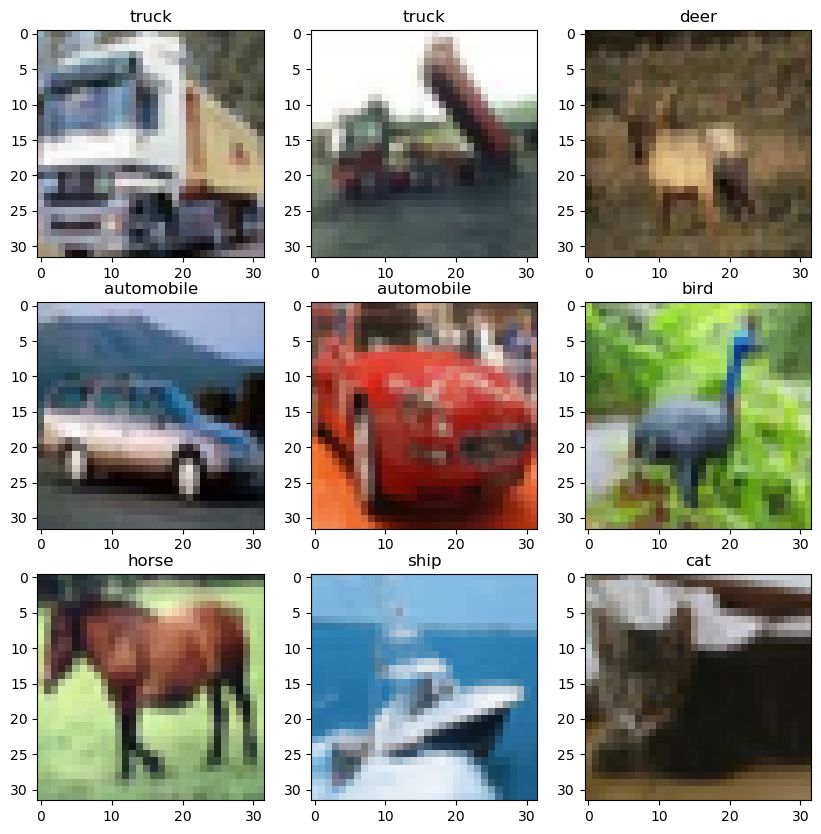

In [7]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches(10, 10)
for i in range(1, 10):
    plt.subplot(3, 3, i)
    axis = plt.gca()
    axis.set_title(class_names[training_dataset_y[i, 0]])
    plt.imshow(training_dataset_x[i], cmap='gray')

plt.show()

In [8]:
# min-max ölçeklendirmesi
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

In [9]:
# ohe
from tensorflow.keras.utils import to_categorical

training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

In [10]:
training_dataset_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential('NewModel')
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling-1'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling-2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(32, activation='relu', name='Hidden-1'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

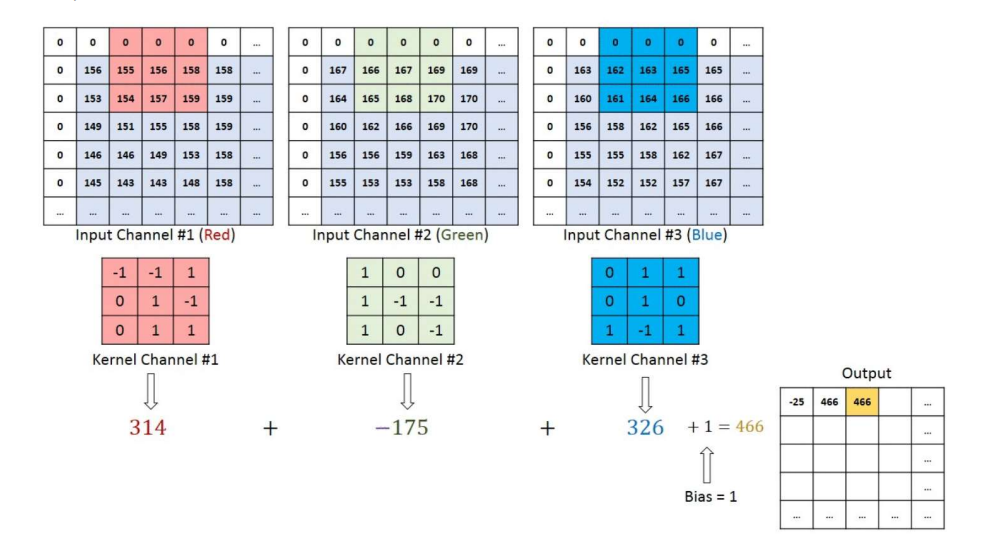

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(training_dataset_x, training_dataset_y, epochs=5, batch_size=64, validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Categorical Accuracy - Epoch Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.plot(range(1, len(hist.history['categorical_accuracy']) + 1), hist.history['categorical_accuracy'])
plt.plot(range(1, len(hist.history['val_categorical_accuracy']) + 1), hist.history['val_categorical_accuracy'])
plt.legend(['Categorical Accuracy', 'Validation Categorical Accuracy'])
plt.show()

In [ ]:

eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]} --> {eval_result[i]}')

In [ ]:
import numpy as np
import itertools
import glob

figure = plt.gcf()
figure.set_size_inches((10,10))
for index, path in enumerate(itertools.islice(glob.glob('test-cifar10/*.jpg'), 9)):
    img_data = plt.imread(path)
    scaled_img_data = img_data / 255
    result = model.predict(scaled_img_data.reshape(1, 32, 32, 3))
    number = np.argmax(result)
    plt.subplot(3, 3, index + 1)
    axis = plt.gca()
    axis.set_title(class_names[number])
    plt.imshow(img_data)

plt.show()

## Tüm Kodlar

https://www.kaggle.com/datasets/fedesoriano/cifar10-python-in-csv

In [ ]:
from tensorflow.keras.datasets import cifar10

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f'training_dataset_x.shape: {training_dataset_x.shape}' )
print(f'training_dataset_y.shape: {training_dataset_y.shape}' )
print(f'test_dataset_x.shape:     {test_dataset_x.shape}' )
print(f'test_dataset_y.shape:     {test_dataset_y.shape}' )

import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches(10, 10)
for i in range(1, 10):
    plt.subplot(3, 3, i)
    axis = plt.gca()
    axis.set_title(class_names[training_dataset_y[i, 0]])
    plt.imshow(training_dataset_x[i], cmap='gray')

plt.show()

# min-max ölçeklendirmesi
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

# ohe
from tensorflow.keras.utils import to_categorical

training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling-1'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling-2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(32, activation='relu', name='Hidden-1'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(training_dataset_x, training_dataset_y, epochs=5, batch_size=64, validation_split=0.2)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Epoch-Loss Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Categorical Accuracy - Epoch Graph', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy')
plt.plot(range(1, len(hist.history['categorical_accuracy']) + 1), hist.history['categorical_accuracy'])
plt.plot(range(1, len(hist.history['val_categorical_accuracy']) + 1), hist.history['val_categorical_accuracy'])
plt.legend(['Categorical Accuracy', 'Validation Categorical Accuracy'])
plt.show()

eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]} --> {eval_result[i]}')

# Şimdi yeni resim bulup 9 fotoğrafı sınıflandırmaya çalışalım. Resimler 32x32x3

import numpy as np
import itertools
import glob

figure = plt.gcf()
figure.set_size_inches((10,10))
for index, path in enumerate(itertools.islice(glob.glob('test-cifar10/*.jpg'), 9)):
    img_data = plt.imread(path)
    scaled_img_data = img_data / 255
    result = model.predict(scaled_img_data.reshape(1, 32, 32, 3))
    number = np.argmax(result)
    plt.subplot(3, 3, index + 1)
    axis = plt.gca()
    axis.set_title(class_names[number])
    plt.imshow(img_data)

plt.show()

## ÖDEV: Renkli resimleri sınıflandırılması için CIFAR-100 örnek dataseti üzerinde çalışın.

class_names --> 100'lük bir liste